In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [8]:


df = pd.read_csv("../data/spam.csv", encoding="latin1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
# Keep only the real columns
df = df[['v1', 'v2']]

# Rename to clean names
df.columns = ['label', 'text']

df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'\d+', ' ', s)                # remove numbers
    s = re.sub(r'[^\w\s]', ' ', s)           # remove punctuation
    words = s.split()
    words = [w for w in words if w not in STOPWORDS and len(w) > 1]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [13]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((3900,), (1672,))

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=1000, solver='liblinear'))
])

pipeline.fit(X_train, y_train)


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [15]:
from sklearn.metrics import *

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9677033492822966
Precision: 0.9829545454545454
Recall: 0.7723214285714286
F1: 0.865

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       0.98      0.77      0.86       224

    accuracy                           0.97      1672
   macro avg       0.97      0.89      0.92      1672
weighted avg       0.97      0.97      0.97      1672



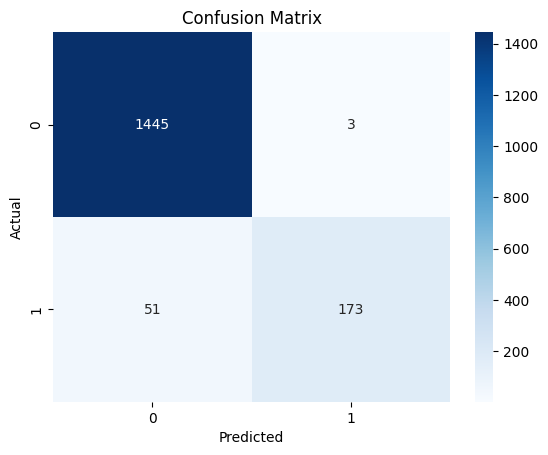

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
import os
os.makedirs("../models", exist_ok=True)


In [19]:
import joblib
joblib.dump(pipeline, "../models/spam_pipeline.joblib")


['../models/spam_pipeline.joblib']